### Import Libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Load Data

In [3]:
df=pd.read_csv('UberDataset.csv')
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,01-01-2016 21:11,01-01-2016 21:17,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,01-02-2016 01:25,01-02-2016 01:37,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,01-02-2016 20:25,01-02-2016 20:38,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,01-05-2016 17:31,01-05-2016 17:45,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,01-06-2016 14:42,01-06-2016 15:49,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [6]:
#Display details of dataframe
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1156 entries, 0 to 1155
Data columns (total 7 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   START_DATE  1156 non-null   object 
 1   END_DATE    1155 non-null   object 
 2   CATEGORY    1155 non-null   object 
 3   START       1155 non-null   object 
 4   STOP        1155 non-null   object 
 5   MILES       1156 non-null   float64
 6   PURPOSE     653 non-null    object 
dtypes: float64(1), object(6)
memory usage: 63.3+ KB


In [8]:
df.describe()

,MILES
count,1156.000000
mean,21.115398
std,359.299007
min,0.500000
25%,2.900000
50%,6.000000
75%,10.400000
max,12204.700000


In [10]:
#Check DataTypes
df.dtypes

START_DATE     object
END_DATE       object
CATEGORY       object
START          object
STOP           object
MILES         float64
PURPOSE        object
dtype: object

In [12]:
#Change Date type Columns
df['START_DATE']=pd.to_datetime(df['START_DATE'],errors='coerce')
df['END_DATE']=pd.to_datetime(df['END_DATE'],errors='coerce')

In [14]:
#Check Datatype
df.dtypes

START_DATE    datetime64[ns]
END_DATE      datetime64[ns]
CATEGORY              object
START                 object
STOP                  object
MILES                float64
PURPOSE               object
dtype: object

### Check missing values

In [17]:
df.isna().sum()[df.isna().sum()>0]

START_DATE    735
END_DATE      736
CATEGORY        1
START           1
STOP            1
PURPOSE       503
dtype: int64

### Drop Duplicates

In [19]:
#check duplicate.
df.duplicated().sum()

56

In [21]:
#Drop Duplicates
df.drop_duplicates(inplace=True)

In [23]:
#Check Drop or Not
df.duplicated().sum()

0

### Handle Missing Values

In [29]:
df.head()

,START_DATE,END_DATE,CATEGORY,START,STOP,MILES,PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,NaN
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [31]:
#fill value
df['START_DATE'] = df['START_DATE'].fillna(pd.Timestamp('01-01-2000'))

In [33]:
df['END_DATE']=df['END_DATE'].fillna(pd.Timestamp('01-01-2016'))

In [35]:
df['CATEGORY']=df['CATEGORY'].fillna('unknown')

In [37]:
df['START']=df['START'].fillna('other')

In [39]:
df['STOP']=df['STOP'].fillna('not mention')

In [41]:
df['PURPOSE']=df['PURPOSE'].fillna('other')

In [43]:
#Check Values Fill or Not
df.isnull().sum()

START_DATE    0
END_DATE      0
CATEGORY      0
START         0
STOP          0
MILES         0
PURPOSE       0
dtype: int64

In [52]:
#Rename Columns
df.head()

,RIDE_START_DATE,RIDE_END_DATE,RIDE_CATEGORY,START_POINT,STOP_POINT,RIDE_MILES,RIDE_PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,other
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


In [54]:
#change rename column
df=df.rename(columns={'START_DATE':'RIDE_START_DATE','END_DATE':'RIDE_END_DATE','CATEGORY':'RIDE_CATEGORY','START':'START_POINT','STOP':'STOP_POINT','MILES':'RIDE_MILES','PURPOSE':'RIDE_PURPOSE'})
df.head()

,RIDE_START_DATE,RIDE_END_DATE,RIDE_CATEGORY,START_POINT,STOP_POINT,RIDE_MILES,RIDE_PURPOSE
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,other
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit


### Split Time From Date

In [61]:
from datetime import datetime
df['RIDE_START(TIME)']=df['RIDE_START_DATE'].dt.hour
df['RIDE_START(TIME)']=pd.cut(x=df['RIDE_START(TIME)'],bins=[0,10,15,19,24],labels=['Morning','Afternoon','Evening','Night'],include_lowest=True,right=False)

In [63]:
df.head()

,RIDE_START_DATE,RIDE_END_DATE,RIDE_CATEGORY,START_POINT,STOP_POINT,RIDE_MILES,RIDE_PURPOSE,RIDE_START(TIME)
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Night
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,other,Morning
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Night
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Evening
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Afternoon


### Some Calculations And Visulization

In [68]:
#In Which Category pepole do pepole book the most uer ride ?
most_booking=df['RIDE_CATEGORY'].value_counts().idxmax()
Total_booking=df['RIDE_CATEGORY'].value_counts().max()
print(f"Most Of The Uber Rides Are Books For The {most_booking} Total {Total_booking} Ride Books")

Most Of The Uber Rides Are Books For The Business Total 1023 Ride Books


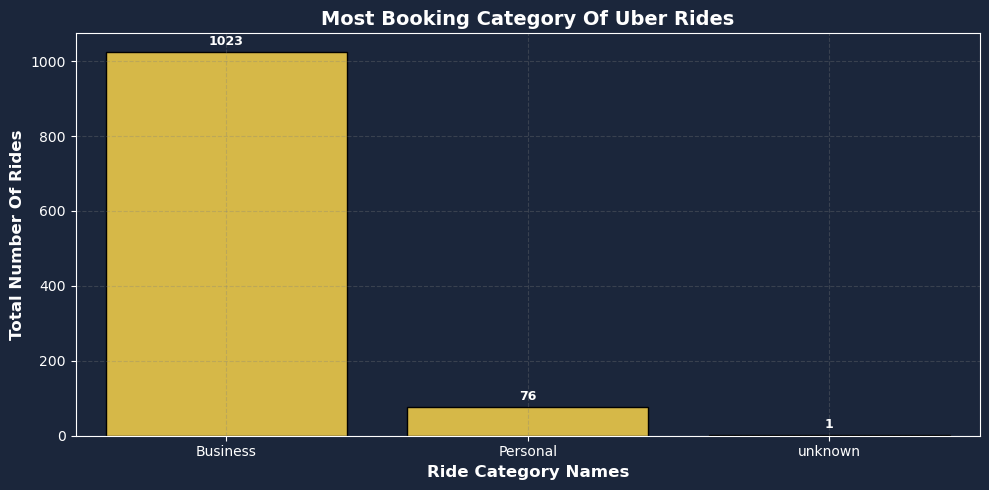

In [70]:
#See This Using Visualization
plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
    "grid.color": "gray",
    "grid.linestyle": "--",
    "grid.alpha": 0.3,
})
plt.figure(figsize=(10,5),dpi=100)
ax=sns.countplot(data=df,x='RIDE_CATEGORY',color='#edc531',edgecolor='black')
for bar in ax.containers:
    ax.bar_label(bar, padding = 3, weight = 'bold', fontsize = 9)

plt.title("Most Booking Category Of Uber Rides",fontsize=14,weight='bold')
plt.xlabel("Ride Category Names",fontsize=12,weight='bold')
plt.ylabel("Total Number Of Rides",fontsize=12,weight='bold')
plt.grid(True)
plt.tight_layout()
plt.show()

In [72]:
#For Which Purpose Pepole Book most uber rides
category_counts=df['RIDE_PURPOSE'].value_counts().idxmax()
count=df['RIDE_PURPOSE'].value_counts().max()
print(f"Most Of The Uber Rides Are Books For The {category_counts} Purpose & {count} Ride Books")

Most Of The Uber Rides Are Books For The other Purpose & 482 Ride Books


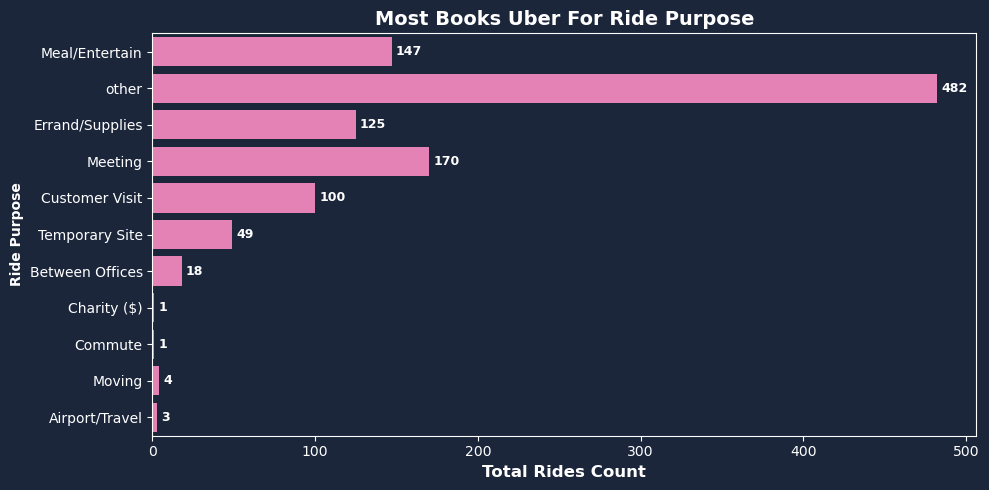

In [74]:
#From Visulaiztion
plt.figure(figsize=(10,5),dpi=100)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
    "grid.color": "gray",
    "grid.linestyle": "--",
    "grid.alpha": 0.3,
})
ax=sns.countplot(data=df,y='RIDE_PURPOSE',color='#f472b6')
for bar in ax.containers:
    ax.bar_label(bar, padding = 3, weight = 'bold', fontsize = 9)

plt.title("Most Books Uber For Ride Purpose",fontsize=14,weight='bold')
plt.xlabel("Total Rides Count",fontsize=12,weight='bold')
plt.ylabel('Ride Purpose')
plt.tight_layout()
plt.show()

In [76]:
#At Which Time Pepole Books Cab Most From Uber
most_uber_Book_Time=df['RIDE_START(TIME)'].value_counts().idxmax()
count=df['RIDE_START(TIME)'].value_counts().max()
print(f"Most Of The Uber Rides Are Books At {most_uber_Book_Time} Clock & {count} Ride Books")

Most Of The Uber Rides Are Books At Morning Clock & 729 Ride Books


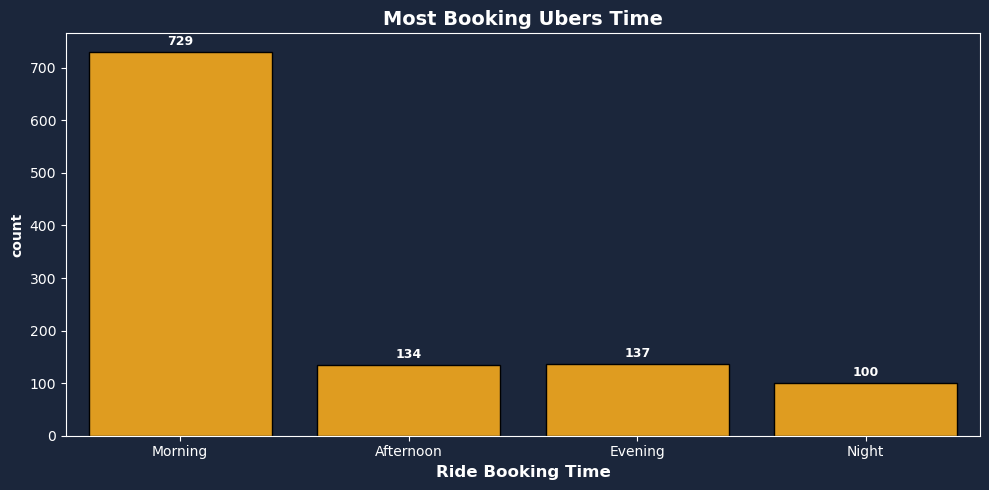

In [82]:
#From Visulization
plt.figure(figsize=(10,5),dpi=100)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
    "grid.color": "gray",
    "grid.linestyle": "--",
    "grid.alpha": 0.3,
})

ax=sns.countplot(data=df,x='RIDE_START(TIME)',color='orange',edgecolor='black')
for bar in ax.containers:
    ax.bar_label(bar, padding = 3, weight = 'bold', fontsize = 9)

plt.title("Most Booking Ubers Time",fontsize=14,weight='bold')
plt.xlabel("Ride Booking Time",fontsize=12,weight='bold')
plt.tight_layout()
plt.show()

In [86]:
#In Which Month Pepole Do Pepole Books Uber Ride In Less Frequency
#First Create Month Column
df['BOOKING_MONTH']=df['RIDE_START_DATE'].dt.month
month_label={1:'Jan',2:'Feb',3:'Mar',4:'Apr',5:'May',6:'Jun',7:'Jul',8:'Aug',9:'Sep',10:'Oct',11:'Nov',12:'Dec'}
df['BOOKING_MONTH']=df['BOOKING_MONTH'].map(month_label)

In [88]:
uber_mont=df['BOOKING_MONTH'].value_counts().idxmin()
count=df['BOOKING_MONTH'].value_counts().min()
print(f"Minimum Of The Uber Rides Are Books At {uber_mont} Month & {count} Ride Books")

Minimum Of The Uber Rides Are Books At Sep Month & 13 Ride Books


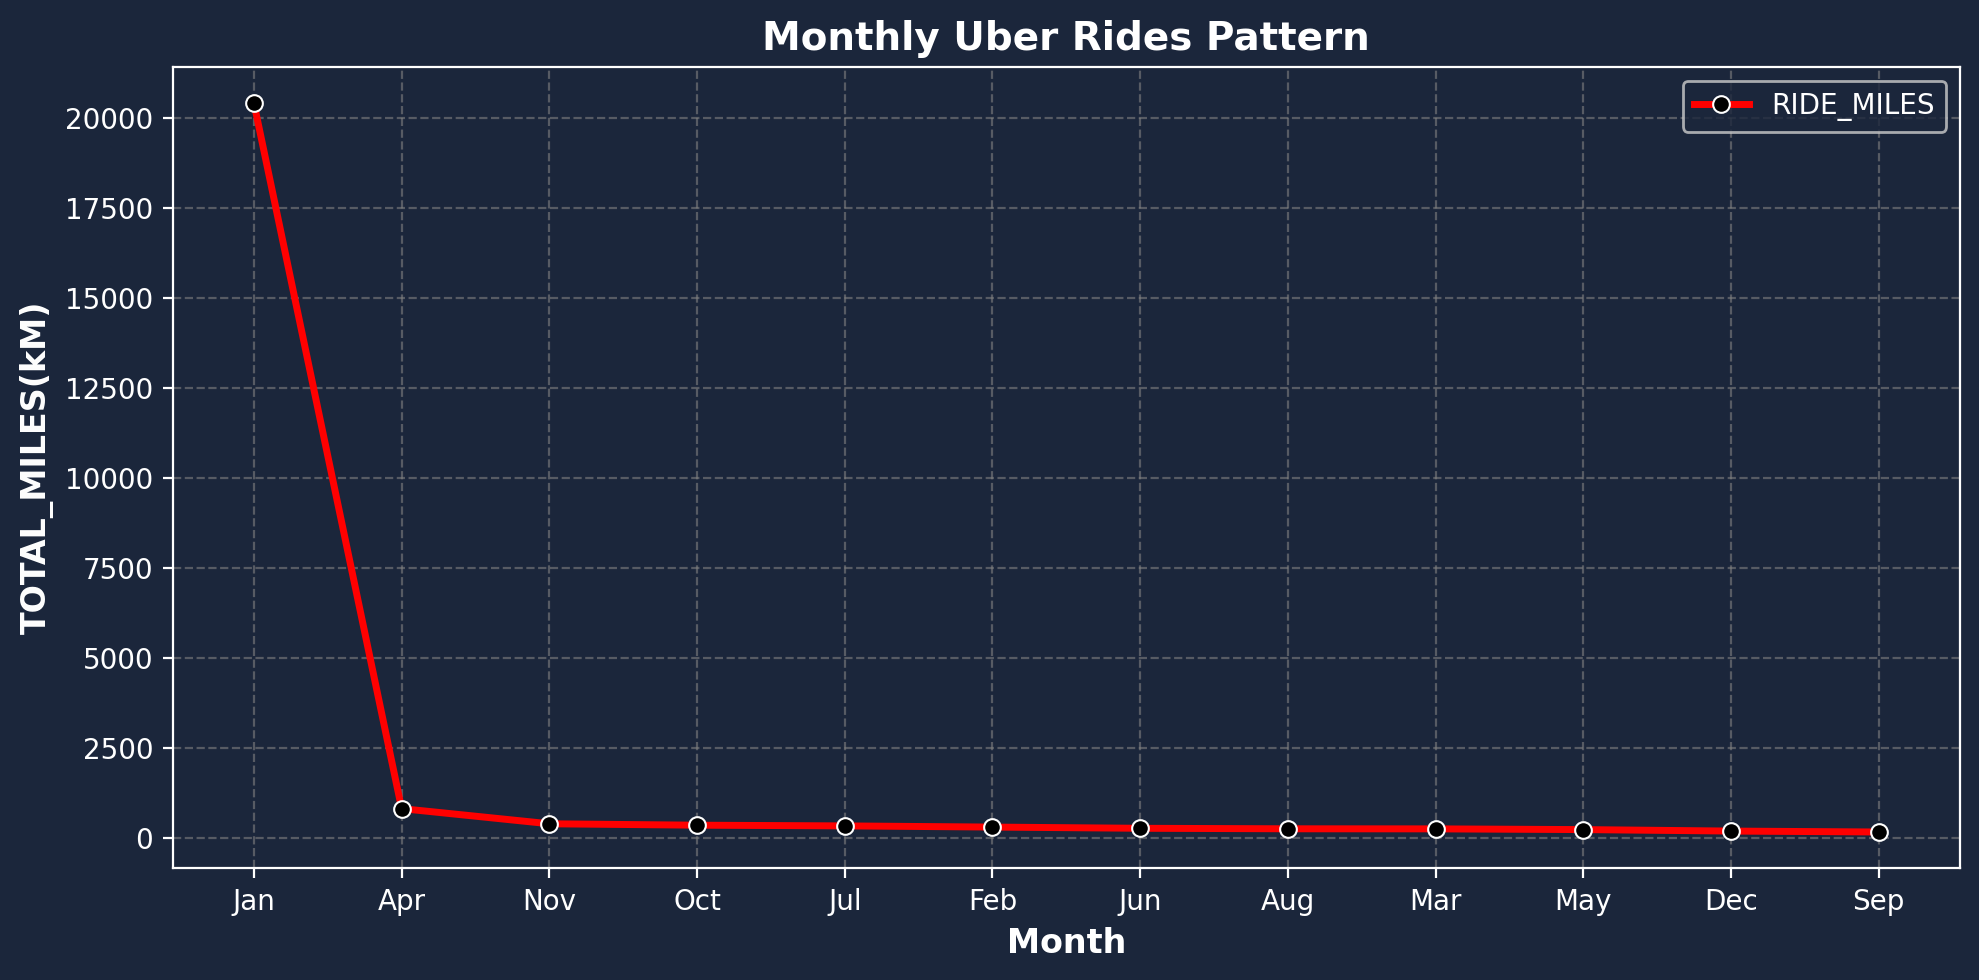

<Figure size 640x480 with 0 Axes>

In [96]:
#Through Visulization

week = df.groupby('BOOKING_MONTH')['RIDE_MILES'].sum().to_frame().sort_values(by='RIDE_MILES',ascending=False)
plt.figure(figsize=(10,5),dpi=200)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
})
sns.lineplot(data=week, x='BOOKING_MONTH', y='RIDE_MILES', marker='o', linewidth=2.5,color='red',markerfacecolor='black',label='RIDE_MILES')

plt.title("Monthly Uber Rides Pattern", fontsize = 14, weight = 'bold')
plt.xlabel("Month",fontsize = 12, weight = 'bold')
plt.ylabel("TOTAL_MILES(kM)", fontsize = 12, weight = 'bold')
plt.legend()
plt.grid(True, linestyle='--', alpha=0.6)
plt.tight_layout()
plt.show()
plt.tight_layout();

In [100]:
#On Which Day Pepole Book Uber Most
#Extract Day from Date 
df['BOOKING_DAY']=df['RIDE_START_DATE'].dt.day_name()

In [102]:
days_counts=df['BOOKING_DAY'].value_counts().idxmax()
ride_count=df['BOOKING_DAY'].value_counts().max()
print(f"The Most Uber Rides Booking on {days_counts} = {ride_count} rides books !")

The Most Uber Rides Booking on Saturday = 731 rides books !


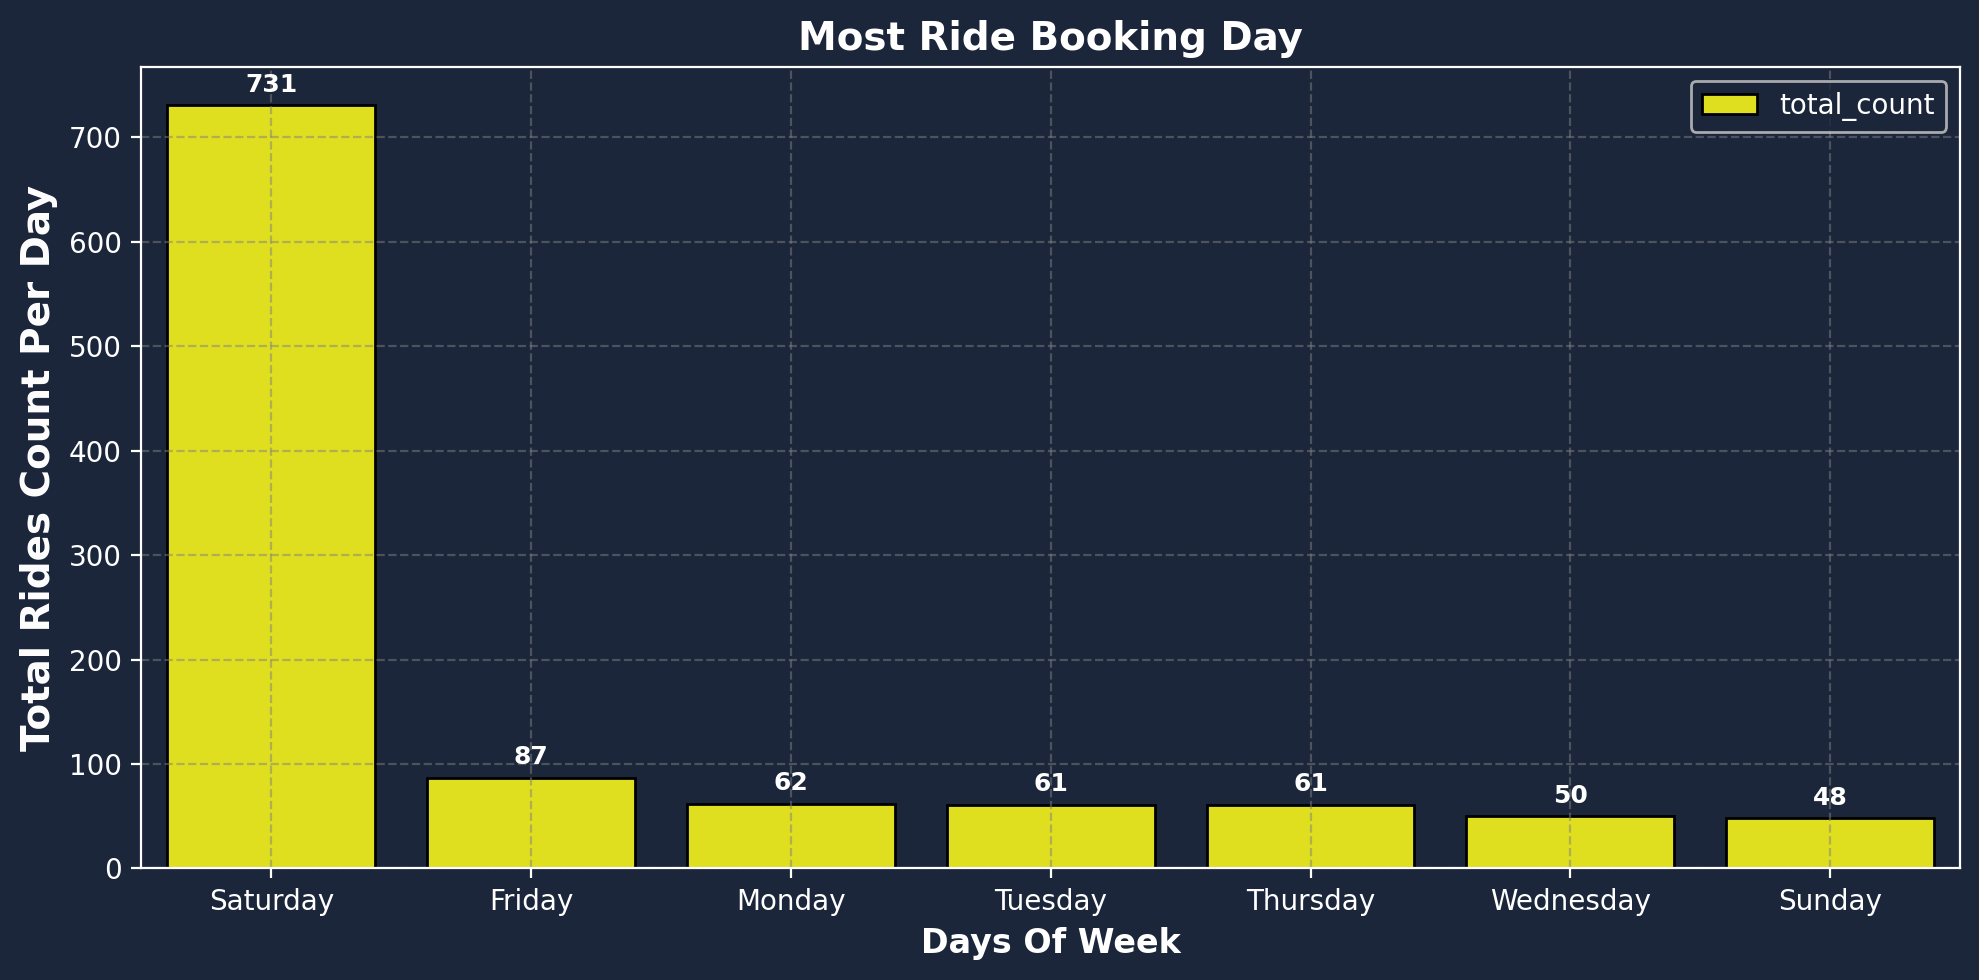

In [104]:
#Understand Through Visulization
total_count=df.BOOKING_DAY.value_counts()
plt.figure(figsize=(10,5),dpi=200)
plt.rcParams.update({
    'figure.facecolor': '#1b263b',  # figure background
    'axes.facecolor': '#1b263b',    # ax background
    'axes.edgecolor': 'white',      # spine color
    'axes.labelcolor': 'white',     # xlabel and ylabel color
    'xtick.color': 'white',         # x-axis tick color
    'ytick.color': 'white',         # y-axis tick color
    'text.color': 'white',          # general text (title, etc.)
    'axes.titleweight': 'bold',     # bold title
    'axes.labelweight': 'bold',     # bold labels
})
ax=sns.barplot(x=total_count.index,y=total_count,color='yellow',edgecolor='black',label='total_count')
for bar in ax.containers:
    ax.bar_label(bar, padding = 3, weight = 'bold', fontsize = 9)

plt.title("Most Ride Booking Day",fontsize=14,weight='bold')
plt.xlabel("Days Of Week",fontsize=12,weight='bold')
plt.ylabel("Total Rides Count Per Day",fontsize=14,weight='bold')
plt.grid(True,linestyle='--',alpha=0.5,color='gray')
plt.legend()
plt.tight_layout()
plt.show()

### Final overview

In [107]:
df.head()

,RIDE_START_DATE,RIDE_END_DATE,RIDE_CATEGORY,START_POINT,STOP_POINT,RIDE_MILES,RIDE_PURPOSE,RIDE_START(TIME),BOOKING_MONTH,BOOKING_DAY
0,2016-01-01 21:11:00,2016-01-01 21:17:00,Business,Fort Pierce,Fort Pierce,5.1,Meal/Entertain,Night,Jan,Friday
1,2016-01-02 01:25:00,2016-01-02 01:37:00,Business,Fort Pierce,Fort Pierce,5.0,other,Morning,Jan,Saturday
2,2016-01-02 20:25:00,2016-01-02 20:38:00,Business,Fort Pierce,Fort Pierce,4.8,Errand/Supplies,Night,Jan,Saturday
3,2016-01-05 17:31:00,2016-01-05 17:45:00,Business,Fort Pierce,Fort Pierce,4.7,Meeting,Evening,Jan,Tuesday
4,2016-01-06 14:42:00,2016-01-06 15:49:00,Business,Fort Pierce,West Palm Beach,63.7,Customer Visit,Afternoon,Jan,Wednesday


### Save To File

In [110]:
df.to_csv('Clean_Uber_Data.csv')